In [1]:
import numpy as np
from datetime import datetime
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier,KNeighborsTransformer
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('clean17.csv')


In [3]:
X_before = data.values


In [4]:
X = X_before[:,3:6]
y = X_before[:,2]


In [5]:
dict = {}
count = 0
for nhaDauTu in X_before[:,6]:
    dict[nhaDauTu]= count
    count+=1

print(dict)


{' Công ty TNHH Một thành viên quản lý và phát triển nhà Hà Nội': 5, 'Bộ Tham Mưu - Bộ Tư Lệnh Bộ Đội Biên Phòng': 8, 'C.T Group': 12, 'Công TNHH Bắc Chương Dương': 18, 'Công ty Booyoung': 58, 'Công ty Cổ phần 118  – Momota': 71, 'Công ty Cổ phần Đầu tư Bất động sản An Bình': 73, 'Công ty Cổ phần Đầu tư Mai Linh': 87, 'Công ty Cổ phần Địa ốc MB': 100, 'Công ty Cổ phần Hợp tác Lao động Nước ngoài - LOD': 102, 'Công ty Cổ phần Licogi 12': 104, 'Công ty Cổ phần Lilama Hà Nội': 105, 'Công ty Cổ phần Tập đoàn FLC': 159, 'Công ty Cổ phần Tasco': 163, 'Công ty Cổ phần TASCO': 165, 'Công ty CP ACC - Thăng Long': 167, 'Công ty CP Bất động sản Dầu khí - Petrowaco': 170, 'Công ty CP Bất động sản Hải Phát': 230, 'Công ty CP Bất động sản Hanovid': 263, 'Công ty CP BIC Việt Nam': 268, 'Công ty CP Đại Việt Trí Tuệ': 295, 'Công ty CP Đầu tư - Thiết kế và Xây dựng Việt Nam': 342, 'Công ty CP Đầu tư – Xây dựng Tây Hà': 344, 'Công ty CP Đầu tư An Lạc': 349, 'Công ty CP Đầu tư Bất động sản Đông Đô - BQP':

In [6]:
# Đổi các nha dau tu thanh so 
for i in range(len(X_before[:,6])):
    for kiemTra in dict.keys():
        if kiemTra == X_before[i,6]:
            X_before[i,6] = dict[kiemTra]
print(X_before[:,6])

[5 5 5 ... 8040 8040 8040]


In [7]:
x_extend = X_before[:,6]

In [8]:
print(np.nan_to_num(x_extend))



[5 5 5 ... 8040 8040 8040]


In [9]:
X = np.column_stack((X, x_extend))
        

In [10]:
X = np.nan_to_num(X)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [12]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
y_train = y_train.astype(np.float)
y_test = y_test.astype(np.float)

In [13]:
knn = KNeighborsRegressor(n_neighbors=4, weights= 'distance')

In [14]:
# Train the model
knn.fit(X_train, y_train)



KNeighborsRegressor(n_neighbors=4, weights='distance')

In [15]:
# Test model's performance using Median Relative Absolute Error
y_pred = knn.predict(X_test)
accuracy = np.median((np.abs(y_pred - y_test) / y_test)**2)

import math

print('%0.5f' % ( 1 - math.sqrt(accuracy)))
print(' giá đoán - giá thật ')
for i in range(len(y_pred)):
    print('%0.2f - %.2f'% ( y_pred[i] /10000000 ,y_test[i]/10000000))
    

0.92972
 giá đoán - giá thật 
232.23 - 270.00
261.00 - 260.00
194.67 - 185.00
252.00 - 300.00
293.96 - 286.00
710.00 - 595.00
190.00 - 187.50
281.61 - 225.00
502.50 - 218.00
352.37 - 350.00
246.73 - 230.00
284.47 - 290.00
157.50 - 157.00
196.00 - 187.00
369.73 - 340.00
260.00 - 290.00
270.00 - 280.00
446.92 - 450.00
197.67 - 235.00
166.91 - 152.70
462.40 - 450.00
363.75 - 169.00
267.49 - 300.00
191.75 - 192.00
252.00 - 260.00
252.00 - 230.00
111.38 - 95.00
324.05 - 380.00
148.00 - 190.00
113.75 - 96.00
463.25 - 460.00
105.69 - 102.00
281.22 - 280.00
176.19 - 185.00
97.10 - 96.50
232.50 - 220.00
452.25 - 450.00
144.25 - 145.00
335.00 - 375.00
210.87 - 175.00
385.00 - 380.00
305.37 - 320.00
119.75 - 126.00
385.00 - 400.00
165.50 - 130.00
125.50 - 118.00
50.00 - 145.00
76.25 - 125.00
211.72 - 200.00
251.14 - 260.00
273.63 - 185.00
310.00 - 300.00
424.75 - 480.00
227.50 - 420.00
276.25 - 265.00
209.55 - 205.00
297.50 - 285.00
138.50 - 140.00
842.50 - 990.00
290.00 - 325.00
751.42 - 850.00


182.00 - 165.00
308.75 - 355.00
357.00 - 350.00
324.91 - 2.60
157.50 - 165.00
299.50 - 280.00
222.50 - 178.00
420.00 - 410.00
234.70 - 248.00
207.00 - 250.00
281.21 - 225.00
408.75 - 450.00
305.66 - 350.00
461.52 - 500.00
257.97 - 350.00
388.00 - 388.00
263.75 - 260.00
71.00 - 65.00
182.50 - 150.00
228.75 - 230.00
191.06 - 190.00
195.00 - 210.00
311.54 - 290.00
533.49 - 530.00
308.75 - 410.00
123.00 - 145.00
123.50 - 111.00
474.96 - 415.00
90.12 - 86.00
215.00 - 210.00
321.73 - 280.00
278.25 - 335.00
189.90 - 205.00
252.00 - 350.00
340.00 - 300.00
148.00 - 125.00
145.40 - 150.00
266.00 - 350.00
129.20 - 130.00
260.00 - 280.00
377.50 - 275.00
363.85 - 360.00
370.00 - 370.00
363.85 - 320.00
152.35 - 220.00
299.00 - 295.00
322.71 - 390.00
226.50 - 220.00
340.00 - 310.00
265.10 - 290.00
80.38 - 82.00
270.00 - 293.00
222.50 - 228.00
387.50 - 360.00
132.50 - 135.00
187.20 - 189.50
538.10 - 295.00
92.50 - 95.00
115.75 - 120.00
242.50 - 232.00
195.00 - 200.00
372.50 - 590.00
355.00 - 340.00
32

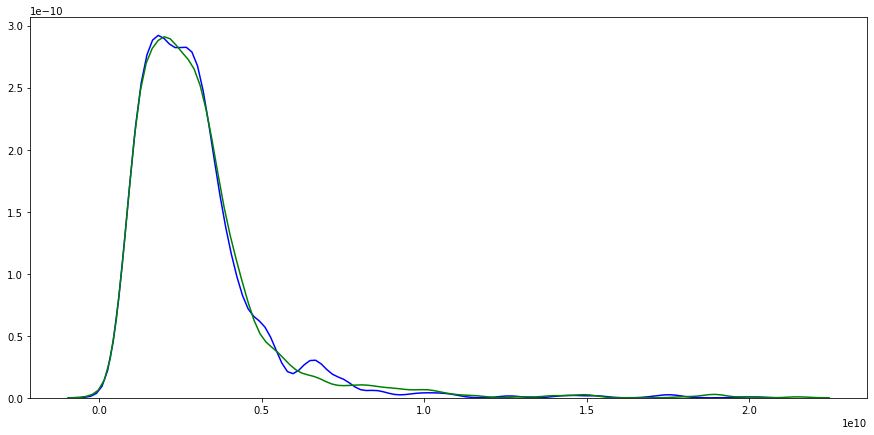

In [16]:
import seaborn as sns
plt.figure(figsize=(15, 7))
sns.distplot(y_pred, kde=True, hist = False, color= 'blue')
sns.distplot(y_test,kde=True, hist = False, color= 'green')
plt.show()